# Deep Learning Project
# Twitter Natural Language Processing for Sentiment Analysis with Sentiment140
## By: Denis O'Byrne
## Date: 07/23/2022

# Required
## Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

## Sections required in your report:

## Main objective of the analysis that also specifies whether your model will be focused on a specific type of Deep Learning or Reinforcement Learning algorithm and the benefits that your analysis brings to the business or stakeholders of this data.

## Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

## Brief summary of data exploration and actions taken for data cleaning or feature engineering.

## Summary of training at least three variations of the Deep Learning model you selected. For example, you can use different clustering techniques or different hyperparameters.

## A paragraph explaining which of your Deep Learning models you recommend as a final model that best fits your needs in terms of accuracy or explainability.

## Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

## Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

# Project Overview: I will be working with a dataset for Twitter Tweet Sentiment Analysis to practice Natural Language Processing (NLP) tecniques using Deep Learning. I will compare the results 3 types of Recurrent NNs starting from a basic RNN, a Long Short-Term Memory RNN (LSTM RNN), and a Gated RNN.

## The goal of the analysis will be to produce a model with the highest accuracy for predicting which of the classes (negative or positive) that the tweets belongs to. This dataset is supposed to include a neutral class but they have been removed by the creator of the dataset for some reason although the data description still claims to contain neutral tweets.

# The Data Set

# For this assignment I will be working with the Sentiment140 dataset which comes from a 2009 study at Stanford University to study customer opinions based on Tweets. The dataset contains 1,600,000 tweets which are labled by a human to reflect the sentiment of the tweet. I have sourced this dataset from Kaggle at the following page:
## [Sentiment140 dataset with 1.6 million tweets](https://www.kaggle.com/datasets/kazanova/sentiment140)

# The full description of the dataset from that page is reproduced below. 

# About Dataset
## Context
### This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = Neutral,  4 = positive) and they can be used to detect sentiment .

## Content
### It contains the following 6 fields:

## target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

## ids: The id of the tweet ( 2087)

## date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

## flag: The query (lyx). If there is no query, then this value is NO_QUERY.

## user: the user that tweeted (robotickilldozr)

## text: the text of the tweet (Lyx is cool)

## Acknowledgements
### The official link regarding the dataset with resources about how it was generated is here
### The official paper detailing the approach is here

### Citation: Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.

# Note that for the purposes of this assignment, since I would like to develop a model that can "read" tweets and "understand" their sentiment, I will be using only the target and text columns of the dataset. If we included other columns our model would no longer be exclusively learning NLP.

# Importing main libraries

In [88]:
import math
import nltk
import scipy
import string
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from scipy.stats import randint
from wordcloud import WordCloud
from multiprocessing import Pool
from nltk.corpus import stopwords
from scipy.stats import loguniform

from sklearn.decomposition import PCA
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, \
roc_auc_score, roc_curve, precision_score, recall_score

from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [41]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras import initializers

# Loading data

In [10]:
tweets = pd.read_csv("C:/Users/denis/Desktop/IBM Machine Learning/Final Projects/data/Tweets/sentiment140.csv", encoding = 'latin',header=None)

In [11]:
tweets

0           1                             2         3  \
0        0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1        0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2        0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3        0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4        0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...     ..         ...                           ...       ...   
1599995  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                       4                                                  5  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1          scotthamilton  is upset that he can't update his Facebook by ...  
2               mattycus  @Kenichan I dived many times for the ball. Man...  
3                ElleCTF    my whole body feels itchy and like its on fire   
4                 Karoli  @nationwideclass no, it's not behaving at all....  
...                  ...                                                ...  
1599995  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599996      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599997           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599998     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599999   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...  

[1600000 rows x 6 columns]

In [14]:
tweets[0].value_counts()

4    800000
0    800000
Name: 0, dtype: int64

# As we see here, the dataset does not actually contain any neutral tweets meaning the claim by the source is false that this dataset contains neutral tweets. I do not know why these were removed we also find that the data is evenly split on these two classes

In [58]:
tweets.rename({0: 'Sentiment', 1: 'Tweet Id', 2: 'Timestamp', 3: 'Flag', 4: 'User', 5: 'text'}, axis=1, inplace=True)

In [59]:
tweets

Sentiment    Tweet Id                     Timestamp      Flag  \
0                0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1                0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2                0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3                0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4                0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...            ...         ...                           ...       ...   
1599995          4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996          4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997          4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998          4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999          4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    User                                               text  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1          scotthamilton  is upset that he can't update his Facebook by ...  
2               mattycus  @Kenichan I dived many times for the ball. Man...  
3                ElleCTF    my whole body feels itchy and like its on fire   
4                 Karoli  @nationwideclass no, it's not behaving at all....  
...                  ...                                                ...  
1599995  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599996      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599997           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599998     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599999   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...  

[1600000 rows x 6 columns]

## Before performing any data cleaning or analysis, I will split the data into a test and train split with 70% of samples in the training set.

In [67]:
X = tweets[['Tweet Id', 'text']]

In [68]:
Y= tweets[['Tweet Id','Sentiment']]

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=7)

In [70]:
X_train.reset_index(inplace = True)
X_train

index    Tweet Id  \
0         548464  2202374961   
1          76880  1695883680   
2         976921  1833686117   
3        1457834  2063618528   
4        1264122  1999178487   
...          ...         ...   
1119995   839891  1559549392   
1119996   535030  2197761532   
1119997   573977  2210144680   
1119998  1238212  1993225205   
1119999   585903  2215792213   

                                                      text  
0                            i want my phoneee back. haha   
1                i want mario kart and guitar hero on wii   
2        i just did kareoke to bohemian rhapsody with c...  
3        @heymilly larry is the possible creative umbre...  
4                     @chelcimac Hey, chelsea.  What's up?  
...                                                    ...  
1119995  @Katne No, they didn't say anything about it i...  
1119996           Wishing i were back in nyc with my pals   
1119997  iTunes Store now says &quot;Download all free ...  
1119998  Is sunburnt from the british weather  good tim...  
1119999  @Sarah_C9 I have no idea... it will depend on ...  

[1120000 rows x 3 columns]

In [71]:
Y_train.reset_index(inplace = True)
Y_train

index    Tweet Id  Sentiment
0         548464  2202374961          0
1          76880  1695883680          0
2         976921  1833686117          4
3        1457834  2063618528          4
4        1264122  1999178487          4
...          ...         ...        ...
1119995   839891  1559549392          4
1119996   535030  2197761532          0
1119997   573977  2210144680          0
1119998  1238212  1993225205          4
1119999   585903  2215792213          0

[1120000 rows x 3 columns]

In [72]:
X_test.reset_index(inplace = True)
Y_test.reset_index(inplace = True)

In [74]:
Y_train['Sentiment'].value_counts()

4    560831
0    559169
Name: Sentiment, dtype: int64

In [75]:
Y_test['Sentiment'].value_counts()

0    240831
4    239169
Name: Sentiment, dtype: int64

## Our train and test splits are now have slightly different proportions of positive and negative tweets. We could fix this, but I do not see that there is any major issue with different sample sizes.

# Natural Language Processing: Data cleaning

# Most NLP models are only succesful if proper work is done to clean the text presented to the model. Text over all other forms of data is prone to severe garbled input, as many tweets will probably contain typos, website links, random symbols, emojis, and incorrect punctuation, and random capitolization. If we just throw our raw data into a model, we will see poor results as there will be too much for the model to learn. Thankfully, Python has the Natural Language Tool Kit (NLTK) package which was built to help to clean and process text data.

# Two important tools in the NLTK library revolve around dimensionality reduction. If we consider an English dictionary, each word in the dictionary would represent a unique dimension in our dataset since our model will want to track the presence of sentimental words or phrases in the tweets. We can reduce the size of our dictionary in two key ways. The first is to throw out 'stop words' which are words that provide no context to the overall statement. NLTK has a list of stop words for reference with a function to remove such words. Example words in this list include: 'I', 'the', 'you', 'this', 'that', and 'is'. In some cases we should be weary of removing stop words and a custom list should be developed for the data being used as we may want to add or remove words that have meaning. Second, we can reduce the dimension of the data by reducing verbs and adjectives down to their stem or root words. As an example I may be 'running' somewhere or have 'ran' there in the past, but in both cases, the action I performed was to 'run' so we would replace all instances of the word run with its root. the specific name for this type of replacement in the case of NLP is called stemming, and NLTK has a function to perform this reduction. The original function for this was the PorterStemmer, but there is a more accurate version called SnowballStemmer, which in some cases is referred to as Porter2. The main difference is that the original algorithm often removed lettters of words that were unnecessary for uniqueness but created nonwords in the process. One example is that the word which would be reduce to whi to remove the ch ending.

# For this dataset we would also like to remove things like hyperlinks, user mentions (@user(s)), and hashtags, and unnecessary punctuation. We may want to keep exclamations as they indicate strong emotions. In many cases, a user may also capitolize their tweets to indicate yelling, meaning that capitolization may be important to track, however we cannot allow the data to track capitolized words separately, so it may be worth while to track the percentage of the total characters excluding punctuation, which are capitolized in the tweet and create a column in the data for this value. It is usually common practice however to make all words lowercase in the data sent through the model for dimensionality reduction, therfore capitolization percentages would need to be calculated prior to this.

In [43]:
stopws = stopwords.words('english')

In [44]:
stopws

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [76]:
str_ex = 'Hi I am a StrInG with CAPItal LettERS'

In [77]:
import re

In [78]:
len(re.findall(r'[A-Z]',str_ex))/(len(str_ex))

0.35135135135135137

In [81]:
q=0
Cap_percent = []
for i in range(len(X_train)):
    q=q+1
    Cap_percent.append(len(re.findall(r'[A-Z]',X_train['text'][i]))/(len(X_train['text'][i])))
print(q)

1120000


In [83]:
max(Cap_percent)

0.9767441860465116

In [84]:
X_train['Cap_percent'] = Cap_percent

In [186]:
def Cap_percent_finder(df):
    r = len(df)
    Cap_percent = []
    for i in range(r):
        Cap_percent.append(len(re.findall(r'[A-Z]',df['text'][i]))/(len(df['text'][i])))
    return Cap_percent

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
## next line checks for hyperlinks and @users
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def clean_text(text, stem = False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [95]:
X_train['text'] = X_train['text'].apply(lambda x: clean_text(x))

In [102]:
X_train['text']

0                                     want phoneee back haha
1                            want mario kart guitar hero wii
2                            kareoke bohemian rhapsody chris
3          larry possible creative umbrella company leisu...
4                                                hey chelsea
                                 ...                        
1119995    say anything amsterdam tom wrote plan come eur...
1119996                                wishing back nyc pals
1119997    itunes store says quot download free updates q...
1119998                sunburnt british weather good times x
1119999    idea depend transportation situation tranny fe...
Name: text, Length: 1120000, dtype: object

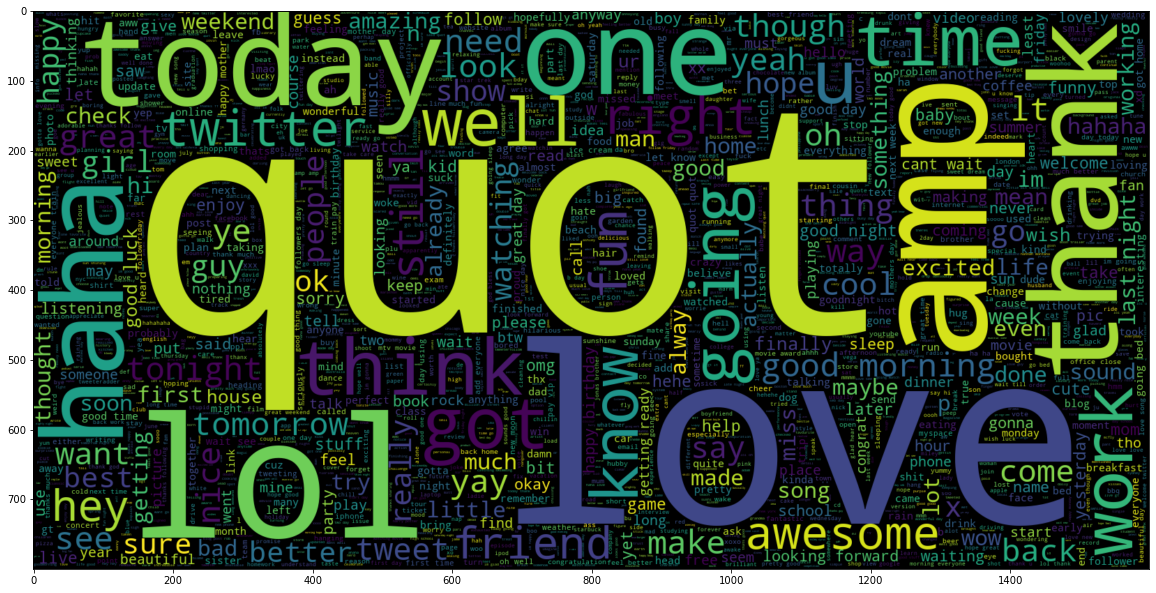

In [108]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(X_train['text'][Y_train['Sentiment'] == 4]))
plt.imshow(wc , interpolation = 'bilinear')

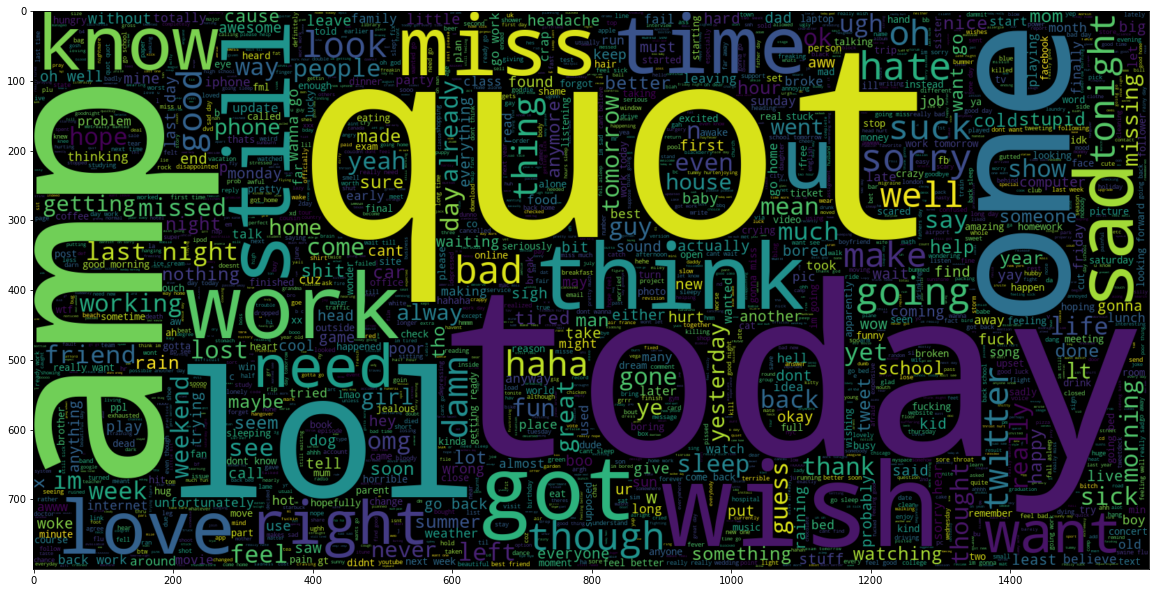

In [109]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(X_train['text'][Y_train['Sentiment'] == 0]))
plt.imshow(wc , interpolation = 'bilinear')

## From the wordclouds we can see that the most common word in both categories is quot, which seems weird considering that this is a very uncommon word in the english language, but I believe that this actually is just the text input by twitter when a user quotes the tweet of another user. This would make sense as people are most likely to have a strong opinion on in a conversation or thread of tweets, but this is not very useful to classifying the tweets. Amp is used in a similar fashion to include the tweet in line with a hyperlink, so this word is also strongly present in both groups.

## One thing that stands out to me is that users are more likely to 'wish' or 'want' something in a negative tweet,  while positive tweets tend to explicitly mention love. 
## Another surprising fact is that 'LOL' is used in both negative and positive tweets, but 'Haha' seems to be used only in positive tweets.

## These word clouds help display the neccesity for context when classifying text, as we can see that there is overwellming overlap between the two groups in the words used.

## The last thing we need to do before we can start training models is to create an ordered dictionary and store the text of the tweets as sequences of elements in the dictionary. These sequences will make LTSM and Gated Recurrent Units easy to train. One problem however is that not every tweet contains the same number of words, but Neural Networks require the data to be constant dimension, meaning we will have to include a blank value in our dictionary to pad all sequences to be the same length of the tweet with the most words.

# The heavy lifting for building the dictionary and sequences of words is all done by Keras. Keras has the Tokenizer method to build a dictionary from the training data and the sequences method with the pad_sequences function to build constant length sequences based on the text and dictionary provided

In [116]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['text'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
## we add 1 for padding sequences
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 266804


In [119]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(X_train['text']))

print("Training X Shape:",x_train.shape)

Training X Shape: (1120000, 50)


## We now have a data frame of 1,120,000 observations of sequences of length 50 where each element in the sequences can be an integer from 0 to 266803 where 0 represents a padded blank value, and all other integers represent a word in our dictionary.

## I will add onto our dataframe the capitolization percentage

In [176]:
X_train_Final = pd.DataFrame(x_train)

In [177]:
X_train_Final['Cap_percent'] = X_train['Cap_percent']

In [178]:
X_train_Final

0  1  2  3  4  5  6  7  8  9  ...    41    42    43     44    45  \
0        0  0  0  0  0  0  0  0  0  0  ...     0     0     0      0     0   
1        0  0  0  0  0  0  0  0  0  0  ...     0     0     0     27  3080   
2        0  0  0  0  0  0  0  0  0  0  ...     0     0     0      0     0   
3        0  0  0  0  0  0  0  0  0  0  ...  2111  3709   891  12516  2685   
4        0  0  0  0  0  0  0  0  0  0  ...     0     0     0      0     0   
...     .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...    ...   ...   
1119995  0  0  0  0  0  0  0  0  0  0  ...   237  3763   718   1271   646   
1119996  0  0  0  0  0  0  0  0  0  0  ...     0     0     0      0     0   
1119997  0  0  0  0  0  0  0  0  0  0  ...   863   259   677      6    42   
1119998  0  0  0  0  0  0  0  0  0  0  ...     0     0     0   2608  2581   
1119999  0  0  0  0  0  0  0  0  0  0  ...     0   350  9826  11976  2105   

            46     47     48    49  Cap_percent  
0           27  20192     14    42     0.000000  
1         7956    875   1750  1418     0.000000  
2        19476  22721  17617  1100     0.000000  
3         5130     50   5130  1074     0.000000  
4            0      0     73  2308     0.055556  
...        ...    ...    ...   ...          ...  
1119995     54   1812    833   315     0.072464  
1119996    607     14   1004  6732     0.025000  
1119997      3    118   1178   677     0.029412  
1119998    179      1    251   108     0.020000  
1119999  12419    665   1339  1854     0.037736  

[1120000 rows x 51 columns]

# Now we apply the same transformations to the testing data

In [184]:
X_test

index    Tweet Id                                               text
0        709290  2257567267         feelin down lately but i've no reason too 
1        654075  2239229077  With ju, clare, elly and zoe about to leave ma...
2        728623  2263115389   Wish I couldve seen Miley and nick sing 2night. 
3        697650  2253881164           Had to work today. 1 hour down, 6 to go.
4       1244425  1994806640  Just started to catch up on House viewing. Kin...
...         ...         ...                                                ...
479995  1049276  1960352990                             My week started today 
479996   271357  1990003795  http://bit.ly/PmvRY   I Want David to Be No.1 ...
479997  1285953  2002202200                  170 followers. yay!  thanks much.
479998  1353929  2046867709  @caligater For Baby Phat!.. 90 days to wait to...
479999  1069478  1965933215  @McCordAnnalynne oh dear, take some aspirins  ...

[480000 rows x 3 columns]

In [187]:
X_test['Cap_percent'] = Cap_percent_finder(X_test)
X_train['text'] = X_train['text'].apply(lambda x: clean_text(x))
x_test = pad_sequences(tokenizer.texts_to_sequences(X_test['text']), maxlen=50)

print("Training X Shape:",x_test.shape)

Training X Shape: (1120000, 50)


In [188]:
print("Training X Shape:",x_test.shape)

Training X Shape: (480000, 50)


In [189]:
X_test_Final = pd.DataFrame(x_test)

In [190]:
X_test_Final['Cap_percent'] = X_test['Cap_percent']

# Before we feed our data into an RNN model we need to take care of 1 more step, we need to embed the words in the sequence so that our model can understand the link between the integers to our vocabulary. Then our model can learn the meaning of the words. There are pretrained embeddings in Keras available for transfer learning, but I would like to start with my own model to begin then we will replace with a pretrained model.

# From here we begin with a basic RNN model

# A Recurrent Neural Network is defined as a model where the ouput of the model is iteratively fed back into the model from the start. In the case of sentiment analysis, this implies that the RNN will process words in the sequences iteratively and keep track of the overall sentiment of the sentence as the sentence progresses. After the sequence is over the final output is mapped to predicted class.

In [218]:
import random
import numpy as np
import tensorflow as tf
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)

In [220]:
from keras.layers import SimpleRNN
rnn_hidden_dim = 10
word_embedding_dim = 50
model_rnn = Sequential()
model_rnn.add(Embedding(vocab_size, word_embedding_dim))  #This layer takes each integer in the sequence and embeds it in a 50-dimensional vector
model_rnn.add(SimpleRNN(rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))

model_rnn.add(Dense(1, activation='sigmoid'))

# RELU ACTIVATION FUNCTION REASONING
## Note that I have chosen to use the ReLu activation function in the RNN Layer. This choice is important as the base model uses a Sigmoid activation by default, however Sigmoid activation has a tendency to lose signal strenghth in deep models due to the vanishing gradient effect. Since we are trying to analyze Sequences of words, the we would like the signal from earlier words in the sequence to persist for an extended time in our model, rather than be lost as the model reads more of the tweet. Therefore I chose to use the ReLu activation which is linear when activated, so it does not suffer from the issue of vanishing Gradients for large values.

## To be consistent to compare the future models, I will use ReLu activation in the LSTM and GRU models as well so that we can compare them all equally.

In [221]:
model_rnn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 50)          13340200  
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 10)                610       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 13,340,821
Trainable params: 13,340,821
Non-trainable params: 0
_________________________________________________________________


In [222]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

model_rnn.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [223]:
y_train_new = []
for i in range(len(Y_train['Sentiment'])):
    if Y_train['Sentiment'][i] == 0:
        y_train_new.append(0)
    else:
        y_train_new.append(1)
y_train_new = np.array(y_train_new)

In [224]:
y_test_new = []
for i in range(len(Y_test['Sentiment'])):
    if Y_test['Sentiment'][i] == 0:
        y_test_new.append(0)
    else:
        y_test_new.append(1)
y_test_new = np.array(y_test_new)

In [225]:
model_rnn.fit(X_train_Final, y_train_new, batch_size=64, epochs = 5, validation_data=(X_test_Final, y_test_new))

Epoch 1/5
17500/17500 [==============================] - 1427s 81ms/step - loss: 0.5607 - accuracy: 0.7049 - val_loss: 0.4800 - val_accuracy: 0.7692
Epoch 2/5
17500/17500 [==============================] - 1356s 78ms/step - loss: 0.4760 - accuracy: 0.7726 - val_loss: 0.4758 - val_accuracy: 0.7714
Epoch 3/5
17500/17500 [==============================] - 1350s 77ms/step - loss: 0.4702 - accuracy: 0.7754 - val_loss: 0.4727 - val_accuracy: 0.7739
Epoch 4/5
17500/17500 [==============================] - 1351s 77ms/step - loss: 0.4681 - accuracy: 0.7770 - val_loss: 0.4709 - val_accuracy: 0.7751
Epoch 5/5
17500/17500 [==============================] - 1363s 78ms/step - loss: 0.4663 - accuracy: 0.7783 - val_loss: 0.4707 - val_accuracy: 0.7756


In [231]:
(1427+1356+1350+1351+1363)/5

1369.4

In [232]:
1369.4/60

22.823333333333334

# We see that after 2 iterations through the training set the model has achieved near peak accuracy, and the model is equally strong on the out of sample testing data indicating that the model has learned to properly interpret the tweets, but there is not much improvement that we can make with this model unless possibly if we make it deeper. I would not like to add layers to an inefficient algorithm however as we can see this took a rather long time (each step should be around 1369s (22.8 minutes).

## We can also improve this model if we use transfer learning to use a more efficient pretrained embedding, but I will hold off on that for now as I believe we will see the strength of LSTM over a basic RNN without a pretrained embedding. 

# Long Short Term Memory Model

## LSTM models are intended to solve an issue with gradient descent in basic RNN models. For a normal neural network, the weighting on nodes is determined through back propagation gradient descent on the activation funtions to find direction in which the change in weight has the largest decrease in the loss. The problem with this method is that most activation functions, including the standard Sigmoid for basic neural networks have a vanishing (near zero) gradient at extreme values, and this problem is exacerbated by back propagation, meaning that the signal from the earlier neurons is usually very weak during back propagation, meaning that the process for training these weights takes the longest.

## In the case of recurrent neural networks, this means that at each iteration through the model, the decision on earlier elements of the sequence are either lost or become weaker over time, meaning that the ability for the model to keep track of the general sentiment of the tweet from the beginning of a tweet may be lost later on in the tweet.

## LSTM models fix this issue by including a way to propagate signals to future neurons in an unaltered state, alloowing the information learned on previous elements in a sequence to be used for computation on later elements in the sequence directly.

# LSTM Architecture

## The LSTM model requires neurons to have 4 key component information gates that determine how long to store information:

### 1. The Input Gate takes in the current element in the sequence to be processed. If we are on the i-th iteration through the LSTM model, then the input gate takes the i-th element of the input sequence.

### 2. The Output Gate sends out the models decision on the sequence at the current iteration through the 

### 3. Forget Gate will remove data from memory if it is not useful.

### 4. Cell State Gate takes in raw data from the previous iteration right before the model made a decision on that data, in other words this gate takes in the data that the previous cell used to produce its output, then after processing its new input along with the previous cell state using input and forget gates, the model produces a new cell state which will be used both to be processed within the cell to produce an output gate decision, and will be passed to the next cell as the current cell state.

### An image of a single iteration (or cell) of the LSTM model can be seen below:

![LSTM Cell](https://miro.medium.com/max/1400/1*XuM8aRzh17kdjeOgrjFE6A.png)


# In the image we are looking at the t-th iteration of the LSTM model. At the start the model takes in the Cell State from the t-1 cell along with the output decision from the t-1 cell. Next the the model is fed the t-th element of the input sequence X. 

# Immediately the LSTM Forget Gate runs. The input element and previous output are passed through a (pink) activation function then the output of this activation function is multiplied with the old cell state to decide what data from the previous cell state to keep in memory.

# The Input Gate runs next. The model in this case feeds the previous cell output and the current sequence element through two activation functions (pink and blue) and multiplies the result of these separate calculations. The result of this multiplication is added to the result of the Forget Gate to produce the current Cell state, C_t for this Cell.

# Lastly the Outout Gate runs. The gate takes the Old Cell output and input sequence element X_t and passes them though an Activation function (pink) and multiplies the result with the result of passing the current cell state C_t through an activation function (blue). The result of this multiplication is the decision of the model at the t-th element of the sequence which is the h_t output. If there are more elements in the sequence to pass through the model, then the cell state c_t and output h_t will be passed through to the next cell t+1, otherwise the h_t constitutes the final decision of the model on the data.

## Note that the activation functions can be any that the user desires, the color schemes are just used to show that during the input and output gates, different activation functions can be used in the same gate. In keras, this is the actual setup of the cells. The default activation functions in Keras set the pink to Sigmoid and Blue to Tanh.

# LSTM Model on Twitter Sentiment Data

In [226]:
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)

In [227]:
from keras.layers import LSTM
rnn_hidden_dim = 10
word_embedding_dim = 50
model_Lstm = Sequential()
model_Lstm.add(Embedding(vocab_size, word_embedding_dim))  #This layer takes each integer in the sequence and embeds it in a 50-dimensional vector
model_Lstm.add(LSTM(units = rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))

model_Lstm.add(Dense(1, activation='sigmoid'))

In [228]:
model_Lstm.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 50)          13340200  
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                2440      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 13,342,651
Trainable params: 13,342,651
Non-trainable params: 0
_________________________________________________________________


In [229]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

model_Lstm.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

# With all elements of the model held equal we can have a proper comparison of RNN to LSTM

In [230]:
model_Lstm.fit(X_train_Final, y_train_new, batch_size=64, epochs = 5, validation_data=(X_test_Final, y_test_new))

Epoch 1/5
17500/17500 [==============================] - 1498s 85ms/step - loss: 0.5836 - accuracy: 0.7036 - val_loss: 0.4845 - val_accuracy: 0.7670
Epoch 2/5
17500/17500 [==============================] - 1496s 86ms/step - loss: 0.4793 - accuracy: 0.7709 - val_loss: 0.4769 - val_accuracy: 0.7706
Epoch 3/5
17500/17500 [==============================] - 1444s 82ms/step - loss: 0.4697 - accuracy: 0.7758 - val_loss: 0.4698 - val_accuracy: 0.7759
Epoch 4/5
17500/17500 [==============================] - 1423s 81ms/step - loss: 0.4644 - accuracy: 0.7799 - val_loss: 0.4673 - val_accuracy: 0.7774
Epoch 5/5
17500/17500 [==============================] - 1459s 83ms/step - loss: 0.4611 - accuracy: 0.7823 - val_loss: 0.4657 - val_accuracy: 0.7786


In [233]:
(1498+1496+1444+1423+1459)/5

1464.0

In [234]:
1464/60

24.4

## We find that in the first 2 epochs of learning, the model is worse than the basic RNN, but on all subsequent epochs the LSTM model is better. Our model achieves a higher in sample and out of sample accuracy, indicating the model has made some improvements although very minor. In any case this model is still better than the basic RNN model.

## LSTM is known to require many epochs to learn about the sequences, so it is not surprising that we did not beat RNN by much since we did not let the model learn for long enough for the true strength of LSTM shine. We also find that LSTM takes slightly longer than basic RNN per epoch with an average time of 1464 seconds vs RNN's 1369 seconds. This increase in computation time is not enough to make me not select the model however.

7320

## We have one other RNN model we can compare with, the Gated Recurrent Units model. The GRU model is intended to act similarly to an LSTM model and has been shown to be faster to train per epoch with similar performance to an LSTM model when the number of training epochs is kept small.

# Gated Recurrent Units Model

## GRUs are a relatively new model, developed in 2014 with the goal of developing a fast alternative to LSTMs.

## GRUs consist of two components which determine how information flows from one cell to the next. These components are as follows:

## 1. The Reset Gate decides which information from previous cells will be used to produce a decision in the current cell.

## 2. The Update Gate produces the current decision on sequence based on the newest input value and the information that was retained through the Reset gate.

### GRUs have 3 architecture options to connect the two units that make up a cell, but for the purpose of this assignment, I will only be looking at the "fully gated" version which can be seen below.

![GRU Cell](https://miro.medium.com/max/1400/1*LfH52lSd1mq-UrWuejzO8g.png)

## Following the diagram can be a little bit confusing as there are overlapping connections, so I will explain what is occuring in depth.

## As with the LSTM model we are taking as input h(t-1) which is the decision of the model on the sequence at the previous cell in the recurssion, and x(t) which is the t-th element of the sequence to be analyzed.

## Step 1. The x(t) is passed through an activation function (red sigmoid #1).

## Step 2. The result is multiplied with h(t-1). 


## These two calculations constitute the reset gate which determines the strength of the previous decision on the decision that will be made in this cell. This result will be used in step 6.

## Step 3. x(t) is passed through a new activation function (red sigmoid #3) and this result is used for two separate calculations in step 4 and step 7.

## Step 4. Using the result from Step 3 we calculate the inverse probability (1 minus our answer from step 3)

## Step 5. The result from Step 4 is multiplied with the previous cells decision to constitute the updated hidden state.

## Note that Steps 3 through 5 constitute the Update Gate.

## Step 6.  Pass the result from the Reset Gate in step 2 into an activation function (Blue Tanh #6).

## Step 7. Multiply the result of Step 3 with the result of Step 6.

## Step 8. Add the result of Step 7 to the result from the Update Gate. The new result is the decision h(t) from the current cell. This h(t) will either be passed into cell t+1 if it exists or into the final decision function to turn the h(t) into a predicted class.

## Note that the GRU model saves memory by not storing a cell state and hidden state separately, and only requires scalar multiplication unlike LSTM which includes three matrix multiplication steps. For this reason, GRUS are notably faster than LSTM models, but they lose the abilty to find more complex sequence structures meaning that with enough training time LSTM models will outperform GRUs as has been shown in many papers. Despite this GRUs tend to keep up with LSTM models with smaller numbers of training epochs. Considering that we have been using 5 epochs I expect these models to perform similarly

# Gated Recurrent Unit Model on Twitter Sentiment Data

In [235]:
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)

In [236]:
from keras.layers import GRU
rnn_hidden_dim = 10
word_embedding_dim = 50
model_GRU = Sequential()
model_GRU.add(Embedding(vocab_size, word_embedding_dim))  #This layer takes each integer in the sequence and embeds it in a 50-dimensional vector
model_GRU.add(GRU(units = rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))

model_GRU.add(Dense(1, activation='sigmoid'))

In [237]:
model_GRU.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 50)          13340200  
_________________________________________________________________
gru_2 (GRU)                  (None, 10)                1860      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 13,342,071
Trainable params: 13,342,071
Non-trainable params: 0
_________________________________________________________________


In [238]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

model_GRU.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [239]:
model_GRU.fit(X_train_Final, y_train_new, batch_size=64, epochs = 5, validation_data=(X_test_Final, y_test_new))

Epoch 1/5
17500/17500 [==============================] - 1464s 84ms/step - loss: 0.5738 - accuracy: 0.7045 - val_loss: 0.4859 - val_accuracy: 0.7693
Epoch 2/5
17500/17500 [==============================] - 1480s 85ms/step - loss: 0.4817 - accuracy: 0.7719 - val_loss: 0.4819 - val_accuracy: 0.7695
Epoch 3/5
17500/17500 [==============================] - 1389s 79ms/step - loss: 0.4747 - accuracy: 0.7745 - val_loss: 0.4746 - val_accuracy: 0.7738
Epoch 4/5
17500/17500 [==============================] - 1411s 81ms/step - loss: 0.4693 - accuracy: 0.7769 - val_loss: 0.4709 - val_accuracy: 0.7751
Epoch 5/5
17500/17500 [==============================] - 1446s 83ms/step - loss: 0.4653 - accuracy: 0.7790 - val_loss: 0.4685 - val_accuracy: 0.7765


# Just as suspected the GRU model is slightly weaker than LSTM but faster to run. This speed up is minor since each model has only 10 cells, but if we add more layers and cells then this would be more obvious, the GRU model is still better than the basic RNN model.

## We can see that the LSTM model is best for accuracy so I will continue to tune this model further

# Lets try with a pretrained embedding, and use transfer learning to tune just the sequential learning of the LSTM model.

# We will be using the GLoVe to start and compare with Word2Vec

In [166]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\Gow/etc/wgetrc
--2022-07-22 18:13:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu... 171.64.67.140
Connecting to nlp.stanford.edu|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-07-22 18:13:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu|171.64.67.140|:443... connected.
ERROR: cannot verify nlp.stanford.edu's certificate, issued by `/C=US/ST=MI/L=Ann Arbor/O=Internet2/OU=InCommon/CN=InCommon RSA Server CA':
  Self-signed certificate encountered.
To connect to nlp.stanford.edu insecurely, use `--no-check-certificate'.
Unable to establish SSL connection.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


## I dont know why I am getting this error, but we can bypass this problem by going directly to the link and downloading the model directly to my computer through a web browser. I have already done this so I will import the model from my computer.

# We will store the embedding into a variable, and note that GLoVe has embeddings for 50, 100, 200, or 300  dimensional word vector embeddings. Recall that for all the previous models I used 50 dimensions. Including more dimensions obviously improves model performance at the cost of training time, but since our embedding is pretrained, I will use the 100-dimensional glove to improve results as our model itself should still take less time to train overall.

In [249]:
GLoVe_100 = "C:/Users/denis/Desktop/IBM Machine Learning/Final Projects/data/glove.6B/glove.6B.100d.txt"

In [250]:
embeddings_index = {}

f = open(GLoVe_100, encoding="utf8")
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [251]:
embed_dim = 100
embedding_matrix = np.zeros((vocab_size, embed_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [253]:
embedding_matrix.shape

(266804, 100)

In [254]:
sequence_length = 50
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          embed_dim,
                                          weights=[embedding_matrix],
                                          input_length= sequence_length,
                                          trainable=False)

## Note that our new embedding layer has the trainable option set to False meaning that we have provided a pretrained sequence embedding. Thus we will see in our full model that the model will require way less parameters to train. Since we have the model summaries from before we know that the embedding required 13 million parameters to be trained so this should noticably speed up the models. Lets start by rebuilding our previous model only replacing the embedding layer.

In [255]:
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)
rnn_hidden_dim = 10
word_embedding_dim = 50
transfer_Lstm = Sequential()
transfer_Lstm.add(embedding_layer)
transfer_Lstm.add(LSTM(units = rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))

transfer_Lstm.add(Dense(1, activation='sigmoid'))

In [256]:
transfer_Lstm.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 50, 100)           26680400  
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                4440      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 26,684,851
Trainable params: 4,451
Non-trainable params: 26,680,400
_________________________________________________________________


In [257]:
model_Lstm.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 50)          13340200  
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                2440      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 13,342,651
Trainable params: 13,342,651
Non-trainable params: 0
_________________________________________________________________


In [260]:
(4440/13342651)*100

0.03327674537841093

# Through transfer learning we get a model with twice as many parameters but only need to train 4,400 parameters which is 0.03% of the orignal amount required, therefore this should be very fast to train.

In [261]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

transfer_Lstm.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [262]:
transfer_Lstm.fit(X_train_Final, y_train_new, batch_size=64, epochs = 5, validation_data=(X_test_Final, y_test_new))

Epoch 1/5
17500/17500 [==============================] - 258s 15ms/step - loss: 0.5974 - accuracy: 0.6897 - val_loss: 0.5422 - val_accuracy: 0.7247
Epoch 2/5
17500/17500 [==============================] - 256s 15ms/step - loss: 0.5368 - accuracy: 0.7282 - val_loss: 0.5230 - val_accuracy: 0.7376
Epoch 3/5
17500/17500 [==============================] - 255s 15ms/step - loss: 0.5196 - accuracy: 0.7409 - val_loss: 0.5122 - val_accuracy: 0.7459
Epoch 4/5
17500/17500 [==============================] - 253s 14ms/step - loss: 0.5105 - accuracy: 0.7471 - val_loss: 0.5064 - val_accuracy: 0.7496
Epoch 5/5
17500/17500 [==============================] - 259s 15ms/step - loss: 0.5052 - accuracy: 0.7510 - val_loss: 0.5032 - val_accuracy: 0.7518


In [263]:
1464/255

5.741176470588235

## Note that by pretraining the embedding layer, keras i now unable to handle the Cap_percent column in my dataset, so we may need to remove it for now, this is why we get the input shape error.

# The model now requires 255 seconds per epoch which is 5.74 times faster per epoch meaning we have plenty of time to train more epochs to improve the model if we want to let the model training time remain constant.

# This speed comes with a cost of strength however, as we can see that the model is clearly weaker than all previous models, so we may need to use a larger dimension for the word vectors to improve model performance to match previous model accuracy.

In [270]:
X_train_Finalv2 = X_train_Final

In [271]:
X_train_Finalv2 = X_train_Finalv2.drop(columns = ['Cap_percent'])

In [273]:
X_test_Finalv2 = X_test_Final

In [274]:
X_test_Finalv2 = X_test_Finalv2.drop(columns = ['Cap_percent'])

# Using 300 dimensional word vector embedding

In [275]:
GLoVe_300 = "C:/Users/denis/Desktop/IBM Machine Learning/Final Projects/data/glove.6B/glove.6B.300d.txt"

In [276]:
embeddings_index = {}

f = open(GLoVe_300, encoding="utf8")
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [277]:
embed_dim = 300
embedding_matrix = np.zeros((vocab_size, embed_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [278]:
embedding_matrix.shape

(266804, 300)

In [279]:
sequence_length = 50
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          embed_dim,
                                          weights=[embedding_matrix],
                                          input_length= sequence_length,
                                          trainable=False)

In [284]:
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)
rnn_hidden_dim = 10
word_embedding_dim = 50
transfer_Lstm = Sequential()
transfer_Lstm.add(embedding_layer)
transfer_Lstm.add(LSTM(units = rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))

transfer_Lstm.add(Dense(1, activation='sigmoid'))

In [285]:
transfer_Lstm.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 50, 300)           80041200  
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                12440     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 11        
Total params: 80,053,651
Trainable params: 12,451
Non-trainable params: 80,041,200
_________________________________________________________________


In [286]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

transfer_Lstm.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [287]:
transfer_Lstm.fit(X_train_Finalv2, y_train_new, batch_size=64, epochs = 5, validation_data=(X_test_Finalv2, y_test_new))

Epoch 1/5
17500/17500 [==============================] - 332s 19ms/step - loss: 0.5685 - accuracy: 0.7119 - val_loss: 0.5192 - val_accuracy: 0.7416
Epoch 2/5
17500/17500 [==============================] - 327s 19ms/step - loss: 0.5145 - accuracy: 0.7450 - val_loss: 0.5042 - val_accuracy: 0.7510
Epoch 3/5
17500/17500 [==============================] - 325s 19ms/step - loss: 0.5000 - accuracy: 0.7546 - val_loss: 0.4943 - val_accuracy: 0.7582
Epoch 4/5
17500/17500 [==============================] - 327s 19ms/step - loss: 0.4915 - accuracy: 0.7607 - val_loss: 0.4888 - val_accuracy: 0.7620
Epoch 5/5
17500/17500 [==============================] - 329s 19ms/step - loss: 0.4860 - accuracy: 0.7646 - val_loss: 0.4861 - val_accuracy: 0.7638


# This model is stronger but still weak compared to the original models. I will allow for more training epochs to see if there is any improvements.  We can resume learning by recalling fit on the same data. I will add 5 more epochs

In [288]:
transfer_Lstm.fit(X_train_Finalv2, y_train_new, batch_size=64, epochs = 5, validation_data=(X_test_Finalv2, y_test_new))

Epoch 1/5
17500/17500 [==============================] - 328s 19ms/step - loss: 0.4819 - accuracy: 0.7671 - val_loss: 0.4832 - val_accuracy: 0.7662
Epoch 2/5
17500/17500 [==============================] - 341s 19ms/step - loss: 0.4791 - accuracy: 0.7687 - val_loss: 0.4821 - val_accuracy: 0.7663
Epoch 3/5
17500/17500 [==============================] - 330s 19ms/step - loss: 0.4770 - accuracy: 0.7702 - val_loss: 0.4789 - val_accuracy: 0.7687
Epoch 4/5
17500/17500 [==============================] - 327s 19ms/step - loss: 0.4752 - accuracy: 0.7715 - val_loss: 0.4775 - val_accuracy: 0.7693
Epoch 5/5
17500/17500 [==============================] - 332s 19ms/step - loss: 0.4736 - accuracy: 0.7723 - val_loss: 0.4774 - val_accuracy: 0.7700


# It looks like this model is slowing down in improvements, and would require many more epochs to get to 0.78 accuracy on the training set like before, so I will stop here for now on training this model.

# We can still change up the architecture of the model for some improvements.

# Currently we have been using a single Sequential Layer of 10 nodes in Keras for the LSTM Layer.
# The Sequential Layer may seem that it is useful for interpreting sequences as we desire due to its name, however in the case of NLP there is a better choice.

# The Sequential Layer is intended to read input as a sequence, where the previous elements in a sequence may influence the later elements, but in the case of language this relationship can go in both directions meaning a later word in a sentence can influence the meaning of a previous word, or vice versa. To allow Keras Neural Networks to learn sequential relationships that may go in either direction, we can use the Bidirectional Layer instead.

# We can improve the model by adding more nodes to the LSTM layer to improve the complexity of arguments that the model can learn. 

# We can add multiple LSTM layers to make the model deeper. This would allow for complexity of decision boundaries to improve as each layer may learn different boundaries.

# We can allow for signal drop out at random to make the model more robust to slight changes in wording/ sentence structure. Dropout requires the model to randomly drop nodes in the model and continue learning without them as a method of regularization to avoid overfitting. Currently we see that our models have been resilient to overfitting, with similar accuracy on the testing and training sets, but we do not know if the model performs well on sequences with similar words but alternative sentence structuring. Dropout would help improve this.

# We can also use a different Optimizer which can improve speed. I will switch from using Rmsprop which was taught in the course to using Adam which is a faster stochastic gradient descent optimizer

# Lastly we can include extra layers in the Neural Network outside of the LSTM layers to learn more about the data beyond what the LSTM model can find.

# Using all of these methods to improve we can build a more robust model below

In [289]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [304]:
#embedding layer is the same as before using the 300 dimensional word vector embedding from GLoVe
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)
new_model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(units = 100, dropout=0.3, kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu', return_sequences=True)),
        Bidirectional(LSTM(units = 100, dropout=0.3, kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu', return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ], name = "ReLu_LSTM_with_GLoVe")

In [305]:
new_model.summary()

Model: "ReLu_LSTM_with_GLoVe"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 50, 300)           80041200  
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 50, 200)           320800    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 50, 200)           240800    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 46, 100)           100100    
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 100)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_39 (Dense)             (None, 1)        

In [306]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

new_model.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [308]:
new_model.fit(X_train_Finalv2, y_train_new, batch_size=64, epochs = 5, validation_data=(X_test_Finalv2, y_test_new))

Epoch 1/5
   14/17500 [..............................] - ETA: 1:49:34 - loss: 0.6891 - accuracy: 0.5179

KeyboardInterrupt: 

## Using a model with this many layers will take way too long to train using 300 word vector embedding, so I will use the 100 word vector embedding instead

In [309]:
embeddings_index = {}

f = open(GLoVe_100, encoding="utf8")
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [325]:
embed_dim = 100
embedding_matrix = np.zeros((vocab_size, embed_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [326]:
sequence_length = 50
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          embed_dim,
                                          weights=[embedding_matrix],
                                          input_length= sequence_length,
                                          trainable=False)

In [327]:
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)
new_model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(units = 20, dropout=0.3, activation='relu', return_sequences=True)),
        Bidirectional(LSTM(units = 20, dropout=0.3, activation='relu', return_sequences=True)),
        Conv1D(20, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(5, activation='relu'),
        Dense(1, activation='sigmoid'),
    ], name = "ReLu_LSTM_with_GLoVe")

In [328]:
new_model.summary()

Model: "ReLu_LSTM_with_GLoVe"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 50, 100)           26680400  
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 50, 40)            19360     
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 50, 40)            9760      
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 46, 20)            4020      
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 20)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_47 (Dense)             (None, 1)        

In [329]:
new_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [330]:
new_model.fit(X_train_Finalv2, y_train_new, batch_size=64, epochs = 5, validation_data=(X_test_Finalv2, y_test_new))

Epoch 1/5
17500/17500 [==============================] - 1175s 67ms/step - loss: 0.5496 - accuracy: 0.7147 - val_loss: 0.4888 - val_accuracy: 0.7617
Epoch 2/5
17500/17500 [==============================] - 1116s 64ms/step - loss: 0.5059 - accuracy: 0.7497 - val_loss: 0.4818 - val_accuracy: 0.7662
Epoch 3/5
17500/17500 [==============================] - 1113s 64ms/step - loss: 0.4979 - accuracy: 0.7554 - val_loss: 0.4751 - val_accuracy: 0.7706
Epoch 4/5
17500/17500 [==============================] - 1159s 66ms/step - loss: 0.4943 - accuracy: 0.7579 - val_loss: 0.4735 - val_accuracy: 0.7720
Epoch 5/5
17500/17500 [==============================] - 1123s 64ms/step - loss: 0.4918 - accuracy: 0.7595 - val_loss: 0.4715 - val_accuracy: 0.7731


# This is better than the original model with the 100 dimensional word vector embedding, but worse than the original 300 word vector embedding, and as seen above, using 300 dimensions in this model is not feasible because each epoch will take over 2 hours to train on and was causing memory issues on my laptop.

# There is still 2 options we have to improve the model.

# First off we can switch to using Word2Vec, which has been shown to perform better on sequential learning sentiment analysis models. I will use this, but I think I have a better plan which will improve model speed so that we can run more epochs in a reasonable time frame.

# Second, we can attempt to improve our input to our model by cleaning the data better. Originally I had only filtered out user names, punctuation, and url links, but this still leaves room for common typos including letter repetition, making our dictionary larger than necesary by mapping a single word to multiple typo entries in the dictionary. There exist methods to account for these typos which may help reduce computation time and improve model performance, so I will make these adjustments

# We will start over from scratch with the original dataset

In [331]:
tweets

Sentiment    Tweet Id                     Timestamp      Flag  \
0                0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1                0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2                0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3                0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4                0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...            ...         ...                           ...       ...   
1599995          4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996          4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997          4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998          4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999          4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    User                                               text  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1          scotthamilton  is upset that he can't update his Facebook by ...  
2               mattycus  @Kenichan I dived many times for the ball. Man...  
3                ElleCTF    my whole body feels itchy and like its on fire   
4                 Karoli  @nationwideclass no, it's not behaving at all....  
...                  ...                                                ...  
1599995  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599996      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599997           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599998     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599999   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...  

[1600000 rows x 6 columns]

# Recall that originally we used stopwords to remove common words, however many of these were contractions that actually do carry meaning, for example contractions formed from the word not, such as shouldn't, since not is a negative word. 

# We can actually use a useful dictionary of English Contractions posted on Kaggle to convert all contractions to their uncontracted versions. The text file is found here: https://www.kaggle.com/datasets/ishivinal/contractions

# For typos we cannot possibly catch all mistakes, but we can catch repeated letter typos, as it is a fact that the English language contains no words with the same letter repeated 3 times in a row, so we can reduce all triple or more repeated letters down to double letters. Although there may be double letter mistakes, it is not as easy to remove these so we will leave them along with other typos. This will be helpful to remove multiple versions of words like Hey or Hi, which people will often extend such as Heyyyyyy when talking to friends. In all cases we will reduce these down to Heyy if needed since we will only be removing letters past a second repitition.

# Lastly, my original data cleaning method removed all forms of punctuation, but this removes important features, such as emojis which help to convey meaning to readers, along with the ever important hashtag which twitter made famous.

# Aside from new methods, there is also a poor choice made on my end to just remove user mentions and url links entirely. It can be helpful for the model to understand the context of the tweet, by replacing such instances with a simple word to indicate their existance, such as user indicating a person was tagged (unnamed after replacement) or the word url indicating a url link was formerly present. This way the model can understand that some one or something is being referenced although the model will not know exactly who or which website this is. This should help the model learn a relationship present in tweets which mention other users or urls that my current models cannot possibly learn.

In [332]:
contractions = pd.read_csv('C:/Users/denis/Desktop/IBM Machine Learning/Final Projects/data/contractions/contractions.csv', index_col='Contraction')

In [333]:
contractions.index = contractions.index.str.lower()
contractions.Meaning = contractions.Meaning.str.lower()
contractions_dict = contractions.to_dict()['Meaning']

# Defining regex patterns.
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
userPattern       = '@[^\s]+'
hashtagPattern    = '#[^\s]+'
alphaPattern      = "[^a-z0-9<>]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

# Defining regex for emojis
smileemoji        = r"[8:=;]['`\-]?[)d]+"
sademoji          = r"[8:=;]['`\-]?\(+"
neutralemoji      = r"[8:=;]['`\-]?[\/|l*]"
lolemoji          = r"[8:=;]['`\-]?p+"

In [334]:
def preprocess_apply(tweet):

    tweet = tweet.lower()

    # Replace all URls with '<url>'
    tweet = re.sub(urlPattern,'<url>',tweet)
    # Replace @USERNAME to '<user>'.
    tweet = re.sub(userPattern,'<user>', tweet)
    
    # Replace 3 or more consecutive letters by 2 letter.
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

    # Replace all emojis.
    tweet = re.sub(r'<3', '<heart>', tweet)
    tweet = re.sub(smileemoji, '<smile>', tweet)
    tweet = re.sub(sademoji, '<sadface>', tweet)
    tweet = re.sub(neutralemoji, '<neutralface>', tweet)
    tweet = re.sub(lolemoji, '<lolface>', tweet)
    
    for contraction, replacement in contractions_dict.items():
        tweet = tweet.replace(contraction, replacement)

    # Remove non-alphanumeric and symbols
    tweet = re.sub(alphaPattern, ' ', tweet)

    # Adding space on either side of '/' to seperate words (After replacing URLS).
    tweet = re.sub(r'/', ' / ', tweet)
    return tweet

In [335]:
tweets['processed_text'] = tweets['text'].apply(preprocess_apply)

# Lets look at the new word clouds for the positive and negative data

In [337]:
X_new = tweets[['Tweet Id', 'processed_text']]

In [338]:
X_train_new, X_test_new, Y_train, Y_test = train_test_split(X_new, Y, train_size=0.7, test_size=0.3, random_state=7)

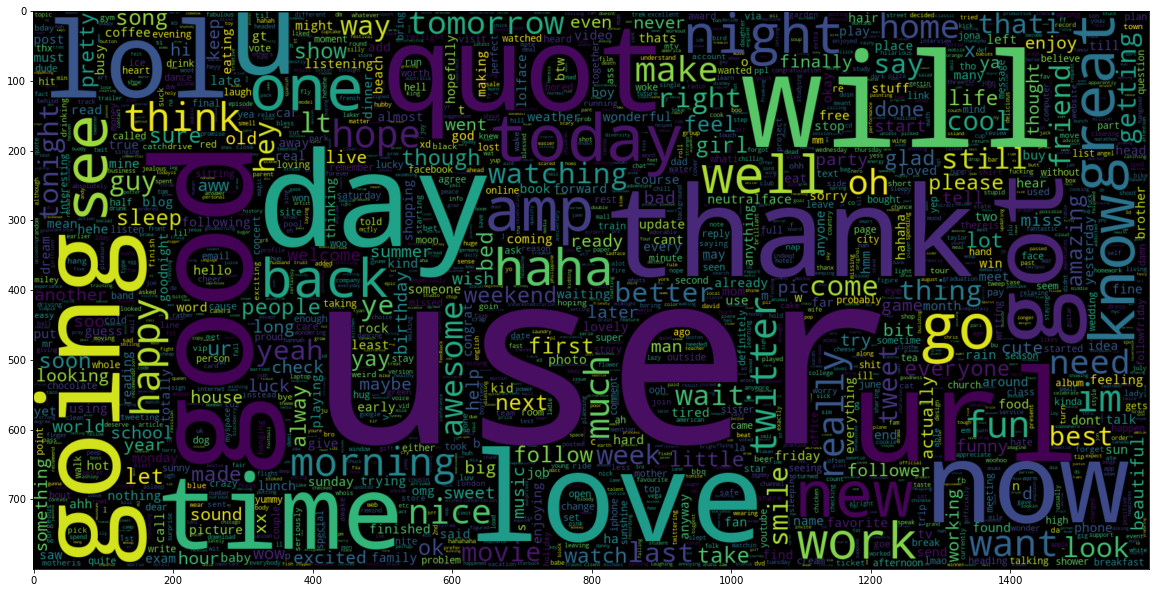

In [340]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, collocations=False).generate(" ".join(X_train_new['processed_text'][Y_train['Sentiment'] == 4]))
plt.imshow(wc , interpolation = 'bilinear')

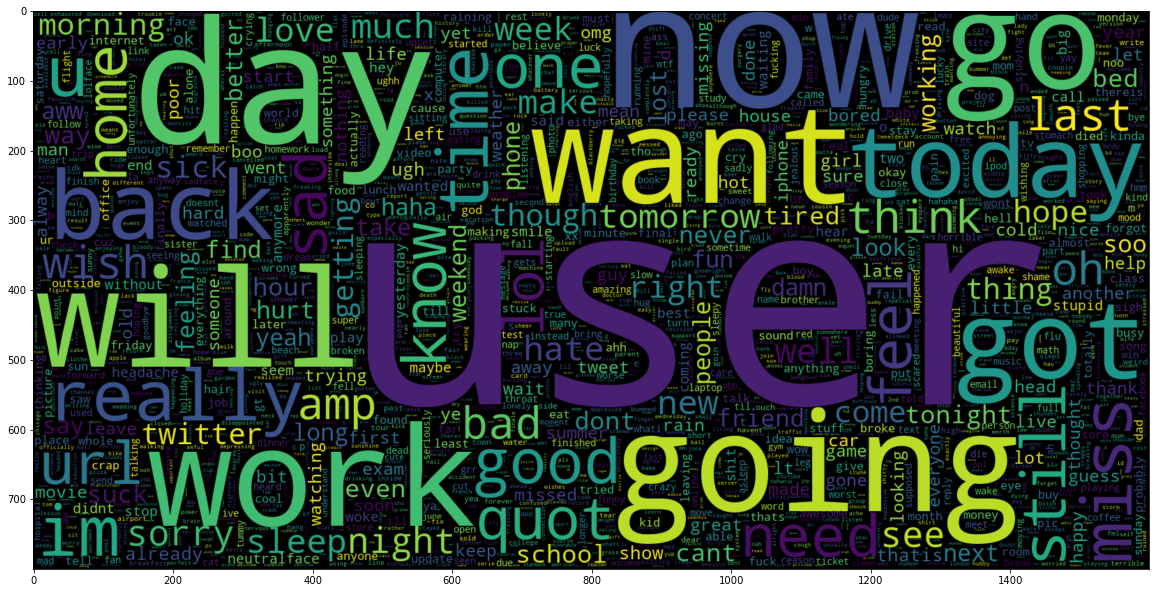

In [341]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, collocations=False).generate(" ".join(X_train_new['processed_text'][Y_train['Sentiment'] == 0]))
plt.imshow(wc , interpolation = 'bilinear')

# Now we can go back to modeling.

# We will start with importing the Word2Vec Embedding. Word2Vec is a word Embedding produced by Google which is provided in the gensim package

In [344]:
pip install --upgrade gensim


  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [345]:
import gensim

In [346]:
from gensim.models import Word2Vec

Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train_new['processed_text']))


In [347]:
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 43582


# Using the default option to remove words with less than 5 total occurances we find that word2vec had determined the dictionary only contains 43,582 words. Recal that our old dictionary length was stored in the variable vocab_size

In [349]:
vocab_size

266804

# Our old dictionary contained 266,804 words, meaning that we were including over 200,000 unnecessary words!

# Although we have removed words from our dictionary, note that we did not remove the stopwords from our dataset, and added in the words url or user so our sequences of words will likely be longer lets see this

In [350]:
vocab_length = 50000

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_train_new['processed_text'])
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 50000


In [351]:
x_train_new = pad_sequences(tokenizer.texts_to_sequences(X_train_new['processed_text']))

print("Training X Shape:",x_train_new.shape)

Training X Shape: (1120000, 52)


In [354]:
x_test_new = pad_sequences(tokenizer.texts_to_sequences(X_test_new['processed_text']), maxlen= 52)

print("Training X Shape:",x_test_new.shape)

Training X Shape: (480000, 52)


# Our new data cleaning method produced a max sequence length of 52. This is not a big issue as 2 extra words per sequence is not that many. Also note that I chose to increase the vocab size to 50,000 just to catch some of the lesser used words.

In [355]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (50000, 100)


## We can streamline the model building into a single function

In [365]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=52,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(20, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(20, dropout=0.3, return_sequences=True)),
        Conv1D(20, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

# Note I have removed the ReLu activation from the LSTM layers. I did some research and found that although ReLu is good for improving backpropagation signal strength, in LSTM layers the signal strenght does not need to be amplified with ReLu since the model is already built to retain strength. Instead the base activation of Sigmiod and Hyperbolic Tangent as described in our original images of the LSTM cells have been shown to have the best performance.

In [366]:
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 52, 100)           5000000   
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 52, 40)            19360     
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 52, 40)            9760      
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 48, 20)            4020      
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 20)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_51 (Dense)             (None, 1)             

# I am going to add 2 additional methods to improve training ability of the model to avoid overfitting.

# First I will add the Keras callback ReduceLROnPlateau, which is intended to weaken the learning rate when the model loss function starts to increase too much during learning indicating that we have overshot the minimum gradient during stochastic gradient descent. Including this ensures that we do not overfit, and helps to mitigate the potential for loss in accuracy if we train for too many epochs.

# Second, I include the EarlyStopping callback which will end training if the model does not improve on some predefined metric by an amount greater than a predefined threshold in a set number of epochs.

# We will use the validation accuracy as the metric for early stopping, and the validation loss as the metric for Reducing the Learning rate

In [367]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [368]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# We now train the model. Note that I ran this model using batch size of 64 as before but changed to 1024 to improve speed. I also ran this model with 5 epochs and saw that the accuracy was really strong so I just reran the model with a lot of epochs all at once since it was clear after 2 epochs that this model was stronger than all others before

In [369]:
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)
history = training_model.fit(
    x_train_new, y_train_new,
    batch_size=1024,
    epochs=12,
    validation_data=(x_test_new, y_test_new),
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/12
1094/1094 [==============================] - 1030s 931ms/step - loss: 0.5017 - accuracy: 0.7515 - val_loss: 0.4173 - val_accuracy: 0.8070
Epoch 2/12
1094/1094 [==============================] - 1016s 929ms/step - loss: 0.4320 - accuracy: 0.7976 - val_loss: 0.4052 - val_accuracy: 0.8138
Epoch 3/12
1094/1094 [==============================] - 1022s 935ms/step - loss: 0.4211 - accuracy: 0.8048 - val_loss: 0.3985 - val_accuracy: 0.8181
Epoch 4/12
1094/1094 [==============================] - 1002s 916ms/step - loss: 0.4153 - accuracy: 0.8079 - val_loss: 0.3948 - val_accuracy: 0.8200
Epoch 5/12
1094/1094 [==============================] - 1002s 916ms/step - loss: 0.4114 - accuracy: 0.8105 - val_loss: 0.3918 - val_accuracy: 0.8217
Epoch 6/12
1094/1094 [==============================] - 1011s 924ms/step - loss: 0.4090 - accuracy: 0.8114 - val_loss: 0.3896 - val_accuracy: 0.8231
Epoch 7/12
1094/1094 [==============================] - 1002s 916ms/step - loss: 0.4074 - accuracy: 0.8130

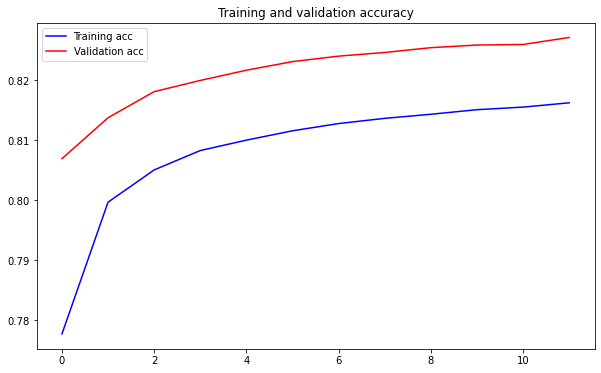

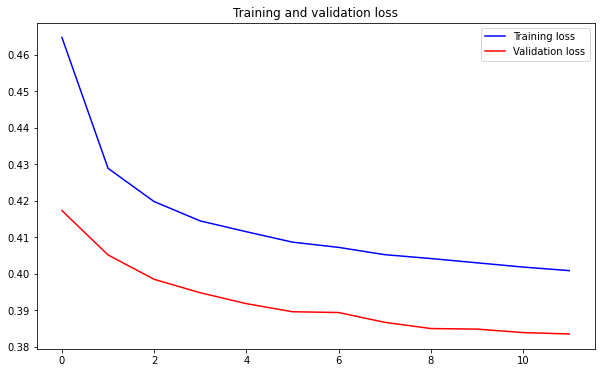

In [376]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# The accuracy vs epoch and loss vs epoch  plots show that the model has not been overfit as the accuracy and loss were monotonically decreasing with epoch, and the model is consistently stronger on the out of sample testing data, so we are not overfit.

# Lets look at the actuall predictive strength of the model

In [377]:
preds_train = training_model.predict(x_train_new)

In [392]:
preds_train = np.array(preds_train)

In [393]:
pred_class_train = []
for i in range(len(preds_train)):
    if preds_train[i]<0.5:
        pred_class_train.append(0)
    else:
        pred_class_train.append(1)

In [378]:
preds_test = training_model.predict(x_test_new)

In [391]:
pred_class_test = []
for i in range(len(preds_test)):
    if preds_test[i]<0.5:
        pred_class_test.append(0)
    else:
        pred_class_test.append(1)

In [396]:
from sklearn import metrics
model_train_acc = metrics.accuracy_score(y_train_new, pred_class_train)
model_train_sen = metrics.recall_score(y_train_new, pred_class_train, pos_label=1)
model_train_spec = metrics.recall_score(y_train_new, pred_class_train, pos_label=0)
print("Training Accuracy  = " + str(model_train_acc) +"\n"
      "Training Sensitivity = " + str(model_train_sen) + "\n"
      "Training Specificity = " + str(model_train_spec))

Training Accuracy  = 0.82895625
Training Sensitivity = 0.8298863650547135
Training Specificity = 0.8280233703942815


# We find that the model is equally efficient at classifying positive and negative tweets and is slightly better than the reported accuray from Keras.

In [398]:
from sklearn.metrics import classification_report
print(classification_report(y_train_new, pred_class_train))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83    559169
           1       0.83      0.83      0.83    560831

    accuracy                           0.83   1120000
   macro avg       0.83      0.83      0.83   1120000
weighted avg       0.83      0.83      0.83   1120000



In [399]:
print(classification_report(y_test_new, pred_class_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83    240831
           1       0.82      0.83      0.83    239169

    accuracy                           0.83    480000
   macro avg       0.83      0.83      0.83    480000
weighted avg       0.83      0.83      0.83    480000



## The model is equally strong on the training data and out of sample testing data

In [425]:
from sklearn.metrics import confusion_matrix

In [426]:
confusion_matrix(y_train_new, pred_class_train)

array([[463005,  96164],
       [ 95405, 465426]], dtype=int64)

In [427]:
confusion_matrix(y_test_new, pred_class_test)

array([[198763,  42068],
       [ 40896, 198273]], dtype=int64)

# Finally we have a good model. Comparing to other results on this dataset we find that 83% accuracy is actually very strong when looking through other Kaggle results. (I looked at other notebooks posted on Kaggle for comparison sorted by most votes to look at some of the highest rated solutions. Link here: https://www.kaggle.com/datasets/kazanova/sentiment140/code?datasetId=2477&sortBy=voteCount). Looking up results online about Sentiment analysis I found on many forums that research shows humans agree on the sentiment of texts around 80-85% of the time meaning that the labling of the sentiment of these tweets may be the confounding issue. I could not find a first hand source for such reseach so I will take this to be only partially true

# Main Source of Error: I believe that the purpose of this dataset was out of sync with the use it has been designed for. In the dataset there are 0 cases of neutral sentiment labels, but if we look at the actual data description, we know that the researchers who collected the data intended to use the data to detect neutral tweets on a seperate testing set. I believe their idea was that if we label all tweets as bad or good we can get a prediction strength telling us how strong of an opinion the tweet has in the positive or negative direction, and neutral tweets would be left with weak predictions. If we think of the way our model works, we have a final sigmoid layer with outputting a predicted probability, which is rounded to 0 or 1. Instead we can set a range for which probabilities get mapped to positive, negative, or neutral, which I believe was the strategy the original researchers used on the testing set with neutral tweets. 

# For example we could set the model to only predict positive if the predicition is 0.75 or above, negative for 0.25 or below and neutral for 0.25-0.75. The neutral range can be shrunk or expanded as needed.

# We can examine this issue, along with the issue of ambiguity by examining some of the tweets that the model incorrectly labels and looking at tweets where the predicted probability is near 0.5

## Lets look at the first 20 samples with a predicted probability between 0.4 and 0.6 to get an idea of the kinds of tweets where the model prediction is not very strong

In [415]:
weak_preds_index = []
j=0
while (len(weak_preds_index)<20) and (j<1000):
    if preds_train[j]<0.52:
        if preds_train[j]>0.48:
            weak_preds_index.append(j)
    j= j+1
    
    

In [416]:
weak_preds_index

[1,
 35,
 38,
 49,
 89,
 190,
 251,
 293,
 420,
 621,
 671,
 679,
 689,
 734,
 852,
 888,
 889,
 890]

In [417]:
for i in weak_preds_index:
    print(i, tweets['processed_text'][i])

1 is upset that he cannot update his facebook by texting it   and might cry as a result  school today also  blah 
35 ok i am sick and spent an hour sitting in the shower cause i was too sick to stand and held back the puke like a champ  bed now 
38 <user> i do not either  its depressing  i do not think i even want to know about the kids in suitcases  
49 <user> oh  i am so sorry  i did not think about that before retweeting 
89 <user> sorry  babe    my fam annoys me too  thankfully  they are asleep right now  muahaha   evil laugh 
190 i activated my selfcontrol block early  meaning i cannot check out the new qc   regularizing my internal clock is might be difficult   fb
251 feeling lost  naked and confused  jk  sort of   no iphone for me  
293 <user>  i am here  friend  and i love you 
420 <user> that happened to me saturday night  along with my glittery green lighter  
621 <user> umm nope  think im an insomniac   plus i got the flu  i will be sleepin like a phuckin fish outta water an

# It seems that the model is unable to understand empathy. In many of these sentences, the user is showing that they are feeling sorry for someone else. Also it looks like the interacctions where the user the presence of laghter in a sad situation is not understood by the model.

## Lets look at mislabeled positive tweets

In [419]:
wrong_when_positive_index = []
j=0
while (len(wrong_when_positive_index)<20) and (j<10000):
    if (pred_class_train[j]==0) and (y_train_new[j] == 1):
            wrong_when_positive_index.append(j)
    j= j+1
    

In [420]:
for i in wrong_when_positive_index:
    print(i, tweets['processed_text'][i])

27 im sad now  miss lilly
35 ok i am sick and spent an hour sitting in the shower cause i was too sick to stand and held back the puke like a champ  bed now 
37 <user> sorry  bed time came here  gmt 1   <url>
44 falling asleep  just heard about that tracy girlis body being found  how sad  my heart breaks for that family 
68 <user>  not forever   see you soon 
75 no picnic  my phone smells like citrus 
80 sleep soon   i just hate saying bye and see you tomorrow for the night  
83 <user> me too   itm
98 <user> you do not follow me  either  and i work for you 
115 <user> damn  the grind is inspirational and saddening at the same time   do not want you to stop cuz i like what u do  much love
117 ugh  cant sleep  its 1 30am  
127 this week just seems to get longer and longer in terms of how much i need to do   and how much i am actually going to get done 
140 sadly is going to bed  
170 crazy wind today   no birding  <url>
185 is watching the hill      and its making me sad 
192 spencer is 

In [421]:
for i in wrong_when_positive_index:
    print(i, tweets['text'][i])

27 im sad now  Miss.Lilly
35 ok I'm sick and spent an hour sitting in the shower cause I was too sick to stand and held back the puke like a champ. BED now 
37 @MissXu sorry! bed time came here (GMT+1)   http://is.gd/fNge
44 Falling asleep. Just heard about that Tracy girl's body being found. How sad  My heart breaks for that family.
68 @katortiz  Not forever... See you soon!
75 No picnic  my phone smells like citrus.
80 sleep soon... i just hate saying bye and see you tomorrow for the night. 
83 @markhardy1974 Me too  #itm
98 @stark YOU don't follow me, either  and i work for you!
115 @mercedesashley Damn! The grind is inspirational and saddening at the same time.  Don't want you to stop cuz I like what u do! Much love
117 ugh. cant sleep. its 1:30am. 
127 This week just seems to get longer and longer in terms of how much I need to do.. and how much I'm actually going to get done 
140 sadly is going to bed. 
170 Crazy wind today = no birding  http://ff.im/1XTTi
185 is watching the hil

## I think we have our answer for the main issues with classifying positive tweets, the dataset itself has incorrect labels.

## Tweet number 27 is clearly a user claiming they are upset which is bad, but the tweet is labeled by the creators of the dataset as positive.

## Tweet 35 is a person claiming to be sick and fighting the urge to puke, I would definitely classify that as a negative tweet as did the model, but again the dataset label is positive.

## Tweet 37 is about a person going to sleep due to timezone differences. this could be neutral but I suppose the sentiment is positive since they mean to appologize. This is labeled properly, so the model has made a mistake.

## Tweet 37 is about a sad situation of a murder victim found. The sentiment is positive as they wish the family well, but the topic of the tweet is dreadful, so as suggested earlier the model does not understand empathy and thus cannot understand the affection conveyed.


### Skipping down a bit

## Tweet 192 is about someone calling someone else a bad person. This tweet is labeled positive but should clearly be negative. 

# As we can see the model is unable to understand empathetic statements clearly, but at the same time the training data is poorly labeled leading to incorrect classifications, and the model is able to make the correct call despite these mistakes.

# Now lets look at misclassified negative tweets

In [422]:
wrong_when_neg_index = []
j=0
while (len(wrong_when_neg_index)<20) and (j<10000):
    if (pred_class_train[j]==1) and (y_train_new[j] == 0):
            wrong_when_neg_index.append(j)
    j= j+1
    

In [423]:
for i in wrong_when_neg_index:
    print(i, tweets['processed_text'][i])

16 hollis  death scene will hurt me severely to watch on film  wry is directors cut not out now 
49 <user> oh  i am so sorry  i did not think about that before retweeting 
67 mo jobs  no money   how in the hell is min wage here 4 f n clams an hour 
74 why will not you show my location    <url>
88 why is it always the fat ones   
129 <user> ehh do not  weatheris going to take a turn for the ugly tomorrow 
130 <user> haha its so coold in the d  and no  but you should still go to the show  they do some incredible stuff
136 i miss kenny powers 
147 my mom might have breast cancer will not find out anything for  like a week i am so worried  
167 going to school soon   cannot find anything to wear   gosh it is so hard 
180 <user> danny im upset that i wasnt here to watch the live chat  i was in a car  for 3 hours on a trip im soo upset  
188 <user>  love the french  i tell people here in the south i am qtr  french and they snarl at me   french are beautiful people
189 opps   as i said   i st

In [424]:
for i in wrong_when_neg_index:
    print(i, tweets['text'][i])

16 Hollis' death scene will hurt me severely to watch on film  wry is directors cut not out now?
49 @tea oh! i'm so sorry  i didn't think about that before retweeting.
67 Mo jobs, no money.  how in the hell is min wage here 4 f'n clams an hour?
74 Why won't you show my location?!   http://twitpic.com/2y2es
88 why is it always the fat ones?! 
129 @thecoolestout Ehhh don't. Weather's gonna take a turn for the ugly tomorrow 
130 @chelserlynn haha its so cooooold in the d! and no  but you should still go to the show. they do some incredible stuff
136 i miss kenny powers 
147 My mom might have breast cancer won't find out anything for. Like a week I'm so worried! 
167 Going to school soon... can't find anything to wear!! gosh it's so hard 
180 @dannyvegasbaby danny im upset that i wasnt here to watch the live chat  i was in a car. for 3 hours on a trip im soooo upset!!
188 @robluketic  love the french. I tell people here in the south i'm qtr. french and they snarl at me.  french are beautif

# Once again we have incorrectly labeled tweets by the dataset itself.

## Tweet 49 is a well intentioned apology, which following by earlier convention should be a positive sentiment. Thus the dataset is not consistent on the idea of well intentioned apologies, which should always be labeled positive.

## Tweet 130 is stating that although it is cold they think the other user should still be able to have a fun time and wishes them such. This is an ambiguous sentiment, as they are upset about the cold but excited and positive about the future events. This is an example of the issue of not including a neutral label for tweets.

## Tweet 188 is about a negative experience the user had but is about a positive oppinion that they hold and the overall sentiment is positive yet this tweet is labeled negative.


## The rest of the tweets seem to be truely negative, but there is no clear link between them to relate why they model is getting them wrong. It does seem that people tend to talk about hoping for better or what they would like or love to happen to remedy a bad situation and the presence of positive emotive words is throwing the model off.

# Conclusion:

## We can see that this final model is very strong at classifying the sentiments of tweets, at a similar rate to humans. This model has helped to demonstrate the strength of LSTM models for interpreting the sentiment from a sequence of words over interpreting single words at a time. We have also seen that there are multiple approches to NLP and cleaning text, and there is no single best method for cleaning text. Instead multiple approches may be necesary to find the best way to store the text data in a way that meets the needsof the model at hand. Furthermore, we have seen that it is not always useful to include all words in the dictionary, since this can usually lead to overfitting and slows down the learning process. Instead we should remove words that are not frequently used to help extract meaning from the words which appear more often as these are the words that usually carry more weight in the meaning of the sentence in realtion to the topic the model is being trained on.  Finally, we have seen the importance of transfer learning to significantly reduce the number of weights needed to be trained in the model. Although it can sometimes be useful to start from scratch for a new model, it is not always the most time efficient way to do so, and it is important for anyone working with Neural Networks to be aware of the resources and pretrained models available such as GLoVe and Word2Vec to improve the performance of their models if necessary

# Next steps:

## In future data it would be useful to include neutral tweets to see if the model is able to recognize that there is no clear positive or negative message in the tweets leading to a prediction between 0.4 and 0.6. I am unsure if the model would require training on such tweets as we have seen the model is capable of doing this on tweets where the sentiment is ambiguous already.

## If we intend to use this model for a buisness purpose, I would suggest that we train on tweets from banned users, so that we get better at detecting negative tweets. We could use this model as a baseline for transfer learning to a model which can track potential malicious users to flag them for manual review.